# Introduction

This Notebook represents a multi-species physiologically-based toxicokinetic (PBTK) model published by <a href='#section_IDRef'>Mangold-Döring et al. (submitted to ES&T in August 2020)</a>. As our previous publications (<a href='#section_IDRef'>Brinkmann et al. 2014a, 2014b, 2016</a>), and the publications by <a href='#section_IDRef'>Nichols et al. (1990)</a> and <a href='#section_IDRef'>Stadnicka et al. (2012)</a>, this model facilitates the prediction of the bioconcentration of neutral organic chemicals in fish. Furthermore, this new tool presented here, enables a multi-species application by including inter-and intra-specific variability in physiological parameters used for model parameterization.  

To facilitate the use of this novel tool, we provide explanations and examples along with the executable program code. This notebook is divided in two parts:<br> 
<a href='#section_IDP1'>Part 1 - Multi-species PBTK model</a><br>
<a href='#section_IDP2'>Part 2 - Analyzing results</a>

For additional information on the model development and purpose, please refer to the original article and its supporting information: <a href='#section_IDRef'>Mangold-Döring et al. (submitted to ES&T in August 2020)</a>.  

### Detailed summary of parameters and variables
#### Definition of chemical-specific model inputs and/or variables
Symbol|Explanation [unit]
---|---
log_Kow|logarithmic octanol-water partitioning coefficient [-]
C_w|chemical concentration in inspired water[µg/L] <br>*note: equals C_exp if sim < expo, otherwise zero*
C_exp|nominal exposure concentration [µg/L]
temp|water temperature [degrees centigrade]
Cox|dissolved oxygen concentration in water [mg O2/L]
sim|simulation time [h]
iter|iteration steps per hour [-]
expo|exposure time [h] <br>*note: per default starting at the beginning of sim*


#### Definition of species-specific model parameters and/or variables
Symbol|Explanation [unit]
---|---
w_w|Body wet weight [kg]
lipid|Total lipid content of fish [fraction of body weight]
lipid_l|lipid content of lean tissue [fraction of body weight]
 | 
alpha_b|lipid content of blood tissue [fraction of body weight]
alpha_f|lipid content of fat tissue [fraction of body weight]|
alpha_k|lipid content of kidney tissue [fraction of body weight]
alpha_l|lipid content of liver tissue [fraction of body weight]
alpha_m|lipid content of muscle tissue [fraction of body weight]
alpha_g|lipid content of gonad tissue [fraction of body weight]
 | 
gamma_b|water content of blood tissue [fraction of wet weight]
gamma_f|water content of fat tissue [fraction of wet weight]
gamma_k|water content of kidney tissue [fraction of wet weight]
gamma_l|water content of liver tissue [fraction of wet weight]
gamma_m|water content of muscle tissue [fraction of wet weight]
gamma_g|water content of gonad tissue [fraction of wet weight]
 | 
V_l|volume of liver compartment [L]
V_f|volume of fat compartment [L]
V_m|volume of poorly perfused compartment [L]
V_r|volume of richly perfused compartment [L]
V_k|volume of kidney compartment [L]
V_g|volume of gonad compartment [L]
 | 
Q_c|cardiac output per 1 kg fish [L/h]
Q_l|blood flow to the liver compartment [L/h]
Q_f|blood flow to the fat compartment [L/h]
Q_m|blood flow to the poorly perfused compartment [L/h]
Q_r|blood flow to the richly perfused compartment [L/h]
Q_k|blood flow to the kidney compartment [L/h]
Q_g|blood flow to the gonad compartment [L/h]
 | 
VO2|oxygen consumption rate per 1 kg fish [mg O2/h]
Q_w|effective respiratory volume [L/h]    
 | 
P_bw|chemical blood:water partition coefficient [-]
P_l|liver:blood partition coefficient of a chemical [-]
P_f|fat:blood partition coefficient of a chemical [-]
P_m|muscle:blood partition coefficient of a chemical [-]
P_k|kidney:blood partition coefficient of a chemical [-]
P_r|richly perfused tissue:blood partition coefficient of a chemical [-]
P_g|gonad:blood partition coefficient of a chemical [-]
 | 
A_f|chemical amount in fat compartment [µg]
A_m|chemical amount in poorly perfused compartment [µg]
A_r|chemical amount in richly perfused compartment [µg]
A_l|chemical amount in liver compartment [µg]
A_k|chemical amount in kidney compartment [µg]
A_g|chemical amount in gonad compartment [µg]
 | 
dA_f|change of Chemical amount in fat compartment [µg/h]
dA_m|change of Chemical amount in poorly perfused compartment [µg/h]
dA_r|change of Chemical amount in richly perfused compartment [µg/h]
dA_l|change of Chemical amount in liver compartment [µg/h]
dA_k|change of Chemical amount in kidney compartment [µg/h]
dA_g|change of Chemical amount in gonad compartment [µg/h]
 | 
C_int|average concentration of the chemical in the whole organism [µg/kg]
C_art|chemical concentration in arterial blood [µg/L]
C_ven|chemical concentration in venous blood [µg/L]
C_f|chemical concentration in fat [µg/L]
C_m|chemical concentration in muscle [µg/L]
C_r|chemical concentration in richly perfused compartment [µg/L]
C_l|chemical concentration in liver [µg/L]
C_k|chemical concentration in kidney [µg/L]
C_g|chemical concentration in gonads [µg/L]

<a id='section_IDP1'></a>
# Part 1 - Multi-species PBTK model
In the following sections you will find the code of the multi-species PBTK mode. To successfully run the model, seven consecutive steps are needed. The aim of each single step will be summarized in comment cells above each step. Additionally, more direct comments can be found as traditional comments within the code cells, commencing a ' **#** '.  

Step 1 – <a href='#section_ID1'>Import packages</a> <br>
Step 2 – <a href='#section_ID2'>Definition of the main classes of the model</a> <br>
Step 3 – <a href='#section_ID3'>Parameterization of model objects</a> <br>
Step 4 – <a href='#section_ID4'>Definition of the main functions</a> <br>
Step 5 – <a href='#section_ID5'>Running the model</a> <br>
Step 6 – <a href='#section_ID6'>Managing output</a> <br>
Step 7 – <a href='#section_ID7'>Saving output</a> <br>

Furthermore, we introduced colored boxes for these purposes: 
- **Blue boxes** contain notes and examples that are especially useful for first time use
- **Red boxes** contain warnings, especially for document saving


<a id='section_ID1'></a>
## Step 1 - Import packages
<div class="alert alert-block alert-info">
<b>Note:</b> Depending on your previous use of the Python packages listed below, you might need to install some of them before you can start. An easy way to do this within this Jupyter notebook, is to insert a new cell below, and use the following command for each missing package <i>XYZ</i>:
    
    !python -m pip install XYZ
    
</div>

In [4]:
import math
import numbers
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import copy as co
import scipy.stats as scst
from scipy.optimize import curve_fit
#from scipy.stats.mstats import gmean #AMD#
import seaborn as sns
import progressbar as pb


<a id='section_ID2'></a>
## Step 2 - Definition of the main classes of the model
The class ***Exposure*** contains all necessary slots for exposure-specific parameters and variables.

In [2]:
class Exposure:
    def __init__(self, name, description, chemical, log_kow, C_w, C_exp, temp, C_ox, sim, iteration, expo):
        self.name = name
        self.description = description
        self.chemical = chemical                     # name of the chemical used in the experiment
        self.log_kow = log_kow                       # log Kow of the chemical
        self.C_w = C_w                               # chemical concentration in inspired water [µg/L], equals C_exp if sim < expo, otherwise zero 
        self.C_exp = C_exp                           # nominal exposure concentration [µg/L]
        self.temp = temp                             # water temperature [degrees centigrade]
        self.C_ox = C_ox                             # dissolved oxygen concentration in water [mg/L]
        self.sim = sim                               # simulation time [h]
        self.iteration = iteration                   # iteration steps per hour [-]
        self.expo = expo                             # exposure time, per default starting at the beginning of sim [h]

The class ***Species*** contains all necessary slots for species-specific parameters and variables.

In [3]:
class Species:
    def __init__(self, name, scientific_name, default_temp, w_w, lipid, lipid_l, alpha_b, alpha_f, alpha_k, alpha_l, alpha_m, alpha_g, gamma_b, gamma_f, gamma_k,
                 gamma_l, gamma_m, gamma_g, V_l, V_f, V_m, V_r, V_k, V_g, Q_c, Q_l, Q_f, Q_m, Q_r, Q_k, Q_g, VO2, Q_w, P_bw, P_l, P_f, P_m, P_k, P_r, P_g, A_f, A_m, A_r,
                 A_l, A_k, A_g, C_int, C_art, C_ven, C_f, C_m, C_r, C_l, C_k, C_g):               
        self.name = name                            # common name of species
        self.scientific_name = scientific_name      # scientific name of species
        self.default_temp = default_temp            # default temperature of exposure water [degrees centigrade], fallback value in case not specified in exposure object
        self.w_w = w_w                              # whole-body wet weight [kg]  
        self.lipid = lipid                          # total lipid content of fish [fraction of body weight]
        self.lipid_l = lipid_l                      # lipid content of lean tissue [fraction of wet weight]
        self.alpha_b = alpha_b                      # lipid content of blood tissue [fraction of wet weight]
        self.alpha_f = alpha_f                      # lipid content of fat tissue [fraction of wet weight]
        self.alpha_k = alpha_k                      # lipid content of kidney tissue [fraction of wet weight]
        self.alpha_l = alpha_l                      # lipid content of liver tissue [fraction of wet weight]
        self.alpha_m = alpha_m                      # lipid content of muscle tissue [fraction of wet weight]
        self.alpha_g = alpha_g                      # lipid content of gonad tissue [fraction of wet weight]
        self.gamma_b = gamma_b                      # water content of blood tissue [fraction of wet weight]
        self.gamma_f = gamma_f                      # water content of fat tissue [fraction of wet weight]
        self.gamma_k = gamma_k                      # water content of kidney tissue [fraction of wet weight]
        self.gamma_l = gamma_l                      # water content of liver tissue [fraction of wet weight]
        self.gamma_m = gamma_m                      # water content of muscle tissue [fraction of wet weight]
        self.gamma_g = gamma_g                      # water content of gonad tissue [fraction of wet weight]
        self.V_l = V_l                              # volume of liver compartment [L]
        self.V_f = V_f                              # volume of fat compartment [L]
        self.V_m = V_m                              # volume of poorly perfused compartment [L]
        self.V_r = V_r                              # volume of richly perfused compartment [L]
        self.V_k = V_k                              # volume of kidney compartment [L]
        self.V_g = V_g                              # volume of gonad compartment [L]
        self.Q_c = Q_c                              # cardiac output for 1 kg fish [L/h]
        self.Q_l = Q_l                              # blood flow to the liver compartment [L/h]
        self.Q_f = Q_f                              # blood flow to the fat compartment [L/h]
        self.Q_m = Q_m                              # blood flow to the poorly perfused compartment [L/h]
        self.Q_r = Q_r                              # blood flow to the richly perfused compartment [L/h]
        self.Q_k = Q_k                              # blood flow to the kidney compartment [L/h]
        self.Q_g = Q_g                              # blood flow to the gonad compartment [L/h]
        self.VO2 = VO2                              # oxygen consumption rate for 1 kg fish [mg O2/h]
        self.Q_w = Q_w                              # effective respiratory volume [L/h]
        self.P_bw = P_bw                            # chemical blood:water partition coefficient
        self.P_l = P_l                              # liver:blood partition coefficient of a chemical [-]
        self.P_f = P_f                              # fat:blood partition coefficient of a chemical [-]
        self.P_m = P_m                              # muscle:blood partition coefficient of a chemical [-]
        self.P_k = P_k                              # kidney:blood partition coefficient of a chemical [-]
        self.P_r = P_r                              # richly perfused tissue:blood partition coefficient of a chemical [-]
        self.P_g = P_g                              # gonad:blood partition coefficient of a chemical [-]
        self.A_f = A_f                              # chemical amount in fat compartment [µg]
        self.A_m = A_m                              # chemical amount in poorly perfused compartment [µg]
        self.A_r = A_r                              # chemical amount in richly perfused compartment [µg]
        self.A_l = A_l                              # chemical amount in liver compartment [µg]
        self.A_k = A_k                              # chemical amount in kidney compartment [µg]
        self.A_g = A_g                              # chemical amount in gonad compartment [µg]
        self.C_int = C_int                          # average concentration of the chemical in the whole organism [µg]
        self.C_art = C_art                          # chemical concentration in arterial blood [µg/L]
        self.C_ven = C_ven                          # chemical concentration in venous blood [µg/L]
        self.C_f = C_f                              # chemical concentration in fat [µg/L]
        self.C_m = C_m                              # chemical concentration in muscle [µg/L]
        self.C_r = C_r                              # chemical concentration in richly perfused compartment [µg/L]
        self.C_l = C_l                              # chemical concentration in liver [µg/L]
        self.C_k = C_k                              # chemical concentration in kidney [µg/L]
        self.C_g = C_g                              # chemical concentration in gonad [µg/L]

<a id='section_ID3'></a>
## Step 3 - Parameterization of model objects 
Here, we specify the values for the parameters of the **chemical object**, as defined in the Exposure class above.<br><br> 
The **default** object *generic_chemical* of the class *Exposure* represents the parameterization of a generic chemical for model testing.

In [4]:
generic_chemical = Exposure("test object", "test exposure with generic chemical", "generic", 3.45, float('nan'), 5, float('nan'), float('nan'), 600, 1000, 300)

<div class="alert alert-block alert-info">
<b>Note:</b> You can check the assigned values of object parameters by creating a dictionary from the object by inserting a new cell below, and using the following command:   
    
    generic_chemical.__dict__
</div>

Next, to create the **species object**, we will specify the values for the parameters defined in the *Species* class above. For the multiple species application, we create the species object as a wrapper for dynamic resampling of statistical parameter distributions from Canadian freshwater fishes. Thus, instead of single parameter values, this object contains **tuple as attributes**, each of which describes the type of statistical distribution for the random number generator, i.e. normal, gamma, or uniform (*tuple[0]*), the center parameter (*tuple[1]*), a shape parameter (*tuple[2]*), and the minimal (*tuple[3]*) and maximal (*tuple[4]*) value.<br><br>The **default** object *generic_species* contains tuples representing the parameter distribution across **all freshwater fishes included in the database**. 

In [5]:
generic_species = Species(
        "generic species",                                # object name
        "canadian freshwater fishes",                     # scientific_name
        ['normal', 15, 1, 0, 20],                         # default_temp 
        ['normal', 0.1, 0.01, 0, 0.2],                    # w_w
        ['uniform', 0.0116, 0.248],                       # lipid
        [float('nan')],                                   # lipid_l
                          
        ['gamma', 2.03871, 0.00241, 0.0059, 0.019],       # alpha_b
        ['normal', 0.82139, 0.08694, 0.6551, 1],          # alpha_f 
        ['gamma', 0.65251, 0.09124, 0.003, 0.2487],       # alpha_k
        ['gamma', 0.90066, 0.17509, 0.0175, 0.538],       # alpha_l 
        ['gamma', 0.3236, 0.68256, 0.0028, 0.2416],       # alpha_m
        ['gamma', 0.87041, 0.02999, 0.0088, 0.1184],      # alpha_g
                          
        ['normal', 0.839, 0.0839, 0, 1],                  # gamma_b
        ['normal', 0.050, 0.005, 0, 1],                   # gamma_f
        ['normal', 0.789, 0.0789, 0, 1],                  # gamma_k
        ['normal', 0.746, 0.01, 0, 1],                    # gamma_l
        ['normal', 0.769, 0.01, 0, 1],                    # gamma_m
        ['normal', 0.769, 0.01, 0, 1],                    # gamma_g
                          
        ['gamma', 2.44742, 0.00877, 0.0059, 0.086],       # V_l
        [float('nan')],                                   # V_f
        ['uniform', 0.741, 0.9395],                       # V_m 
        ['gamma', 14.27458, 0.00472, 0.0147, 0.11],       # V_r
        ['gamma', 1.44424, 0.00244, 0.0021, 0.0131],      # V_k
        ['gamma', 0.78039, 0.06614, 0.0006, 0.4127],      # V_g       
                          
        ['normal', 1.4285, 0.43062, 0.4414, 3.3692],      # Q_c 
        ['gamma', 0.60211, 0.03493, 0.00005, 0.1717],     # Q_l
        ['uniform', 0.0001, 0.112],                       # Q_f
        ['gamma', 8.59983, 0.05257, 0.44, 0.9938],        # Q_m
        ['gamma', 0.70126, 0.11419, 0.0042, 0.526],       # Q_r
        ['uniform', 0.0015, 0.11],                        # Q_k
        ['uniform', 0.00002, 0.0112],                     # Q_g
                          
        ['gamma', 9.51401, 0.32747, 0.7685, 6.3334],      # VO2
        [float('nan')],                                   # Q_w                  
                          
        [float('nan')],                                   # P_bw                  
        [float('nan')],                                   # P_l
        [float('nan')],                                   # P_f                  
        [float('nan')],                                   # P_m
        [float('nan')],                                   # P_k                  
        [float('nan')],                                   # P_r
        [float('nan')],                                   # P_g
                          
        [0],                                              # A_f
        [0],                                              # A_m                                              
        [0],                                              # A_r                                             
        [0],                                              # A_l                                             
        [0],                                              # A_k                                         
        [0],                                              # A_g
                          
        [0],                                              # C_int
        [0],                                              # C_art
        [0],                                              # C_ven
        [0],                                              # C_f
        [0],                                              # C_m
        [0],                                              # C_r
        [0],                                              # C_l
        [0],                                              # C_k
        [0],                                              # C_g

        )

<a id='section_ID4'></a>
## Step 4 - Definition of the main functions
### Initialization functions
The functions *initialize_exposure* and *initialize_species* prepare the *Exposure* and *Species* objects for subsequent use in the main model function *run_model*. The functions are executed from within the *run_model* function.


In [6]:
def initialize_exposure(exposure, species):
    
    ### Checking for missing parameterization of exposure temperature and dissolved oxygen concentration in the exposure scenario.
    #1# If no exposure temperature was defined, the default temperature of your species will be used.
    if math.isnan(exposure.temp):
        exposure.temp = species.default_temp
        
        #1.1# If also, no dissolved oxygen concentration of water was provided, the value will be calculated according to the Weiss equation.
        if math.isnan(exposure.C_ox):
            exposure.C_ox = 1.42905 * math.exp(-173.4292 + 249.6339 * (100 / (exposure.temp + 273.15)) + 143.3483 * math.log((exposure.temp + 273.15) / 100) - 21.8497 * ((exposure.temp + 273.15) / 100))
            
        else:pass
        
    #2# If no dissolved oxygen concentration of water was provided, the value will be calculated according to the Weiss equation.   
    elif math.isnan(exposure.C_ox):
        exposure.C_ox = 1.42905 * math.exp(-173.4292 + 249.6339 * (100 / (exposure.temp + 273.15)) + 143.3483 * math.log((exposure.temp + 273.15) / 100) - 21.8497 * ((exposure.temp + 273.15) / 100))
    
    else:pass
    
    ### Assigning chemical concentration in inspired water, which equals C_exp if sim < expo, otherwise zero
    exposure.C_w = exposure.C_exp
    
    return exposure


def initialize_species(species, exposure):
    
    ### Scaling of cardiac output and oxygen consumption rate:
    #1# Temperature and allometric scaling of Q_c to assigned temperature and weight from initialization
    species.Q_c = (species.Q_c*species.w_w) * math.pow(1.805, (exposure.temp - 15)/10) 
    
    #2# Temperature scaling of VO2 to assigned temperature from initialization, note: since the value is sampled on log10 scaled, we transfer it back here
    species.VO2 = 10 ** (species.VO2 * math.pow(1.805, (exposure.temp - 15)/10)) 
    
    #3# Allometric scaling of VO2 to assigned weight from initialization
    species.Q_w = (species.VO2 / (exposure.C_ox - 0.2 * exposure.C_ox)) * math.pow(species.w_w, 0.8) 
    
    
    ### Calculation and control for mass balance of tissue composition: 
    #1# In this block we check if assigned lipid contents to tissue compartments are within boundaries to ensure tissue composition adds up to 1.     
    if species.lipid   <=0 : species.lipid   = np.random.uniform(0.0116, 0.248)  #total lipid content
    if species.alpha_b <=0 or species.alpha_b>(1-0.12): species.alpha_b = np.random.uniform(0.0059, 0.019)  #blood lipid content
    if species.alpha_f <=0 or species.alpha_f>(1-0.05): species.alpha_f = np.random.uniform(0.6551, 1-0.05) #fat lipid content
    if species.alpha_k <=0 or species.alpha_k>(1-0.15): species.alpha_k = np.random.uniform(0.0477, 0.2487) #kidney lipid content
    if species.alpha_l <=0 or species.alpha_l>(1-0.23): species.alpha_l = np.random.uniform(0.0175, 0.538)  #liver lipid content                 
    if species.alpha_m <=0 or species.alpha_m>(1-0.20): species.alpha_m = np.random.uniform(0.0028, 0.2416) #ppt lipid content   
    if species.alpha_g <=0 or species.alpha_g>(1-0.23): species.alpha_g = np.random.uniform(0.0088, 0.1184) #gonads total lipid content                   
    
    #2# Here, we make tissue compositions result in a sum of 1. The water content is calculated by subtracting the lipid content the solid matter fraction (calculated from water and fat content of previous model inputs) 
    species.gamma_b = 1-species.alpha_b-0.12
    species.gamma_f = 1-species.alpha_f-0.05
    species.gamma_k = 1-species.alpha_k-0.15
    species.gamma_l = 1-species.alpha_l-0.23
    species.gamma_m = 1-species.alpha_m-0.20
    species.gamma_g = 1-species.alpha_g-0.23
    
    
    ### Calculation and control for mass balance of tissue fractions:  
    #1# To ensure mass balance for tissue fractions, we calculate all tissue fractions result in a sum of 1 following random sampling
    species.V_m = 1 - (species.V_l + species.V_g + species.V_r + species.V_k ) 
    
    #2# Scaling of tissue volumes to assigned weight from initialization.
    species.V_l = species.V_l * species.w_w
    species.V_f = species.V_f * species.w_w 
    species.V_m = species.V_m * species.w_w
    species.V_r = species.V_r * species.w_w
    species.V_k = species.V_k * species.w_w
    species.V_g = species.V_g * species.w_w
    
    #3# Calculation of lipid content of lean tissue based on volumes
    species.lipid_l = (species.V_l * species.alpha_l + species.V_r * species.alpha_b + species.V_m * species.alpha_m + species.V_k * species.alpha_k + species.V_g * species.alpha_g) / (species.V_l + species.V_r + species.V_m + species.V_k + species.V_g)
    
    #4# Calculation of volume of fat compartment based on lipid content of lean tissue
    species.V_f = species.w_w * ((species.lipid - species.lipid_l) / (species.alpha_f - species.lipid_l))
    
    #5# Here, we make tissue fractions result in a sum of 1 by calculating the volume of the poorly perfused compartment as the remaining fraction.
    species.V_m = species.w_w  - (species.V_l + species.V_f + species.V_g + species.V_r + species.V_k)
  
    
    ### Calculation and control for mass balance of blood flows: 
    #1# To ensure mass balance for blood flows, we calculate all tissue blood flows to result in a sum of 1 following random sampling
    species.Q_m = 1 - (species.Q_l + species.Q_f + species.Q_r + species.Q_k + species.Q_g) 
    
    #2# Calculation of blood flows to tissue compartments based on assigned cardiac output
    species.Q_l = species.Q_l * species.Q_c
    species.Q_f = species.Q_f * species.Q_c
    species.Q_m = species.Q_m * species.Q_c
    species.Q_r = species.Q_r * species.Q_c
    species.Q_k = species.Q_k * species.Q_c
    species.Q_g = species.Q_g * species.Q_c
  
    
    #3# Calculation of partitioning coefficients
    species.P_bw = math.pow(10, (0.72 * exposure.log_kow + 1.04 * math.log10(species.alpha_b) + 0.86) + species.gamma_b)
    species.P_l = (math.pow(10, (0.72 * exposure.log_kow + 1.04 * math.log10(species.alpha_l) + 0.86)) + species.gamma_l) / species.P_bw
    species.P_f = (math.pow(10, (0.72 * exposure.log_kow + 1.04 * math.log10(species.alpha_f) + 0.86)) + species.gamma_f) / species.P_bw
    species.P_m = (math.pow(10, (0.72 * exposure.log_kow + 1.04 * math.log10(species.alpha_m) + 0.86)) + species.gamma_m) / species.P_bw 
    species.P_k = (math.pow(10, (0.72 * exposure.log_kow + 1.04 * math.log10(species.alpha_k) + 0.86)) + species.gamma_k) / species.P_bw 
    species.P_g = (math.pow(10, (0.72 * exposure.log_kow + 1.04 * math.log10(species.alpha_g) + 0.86)) + species.gamma_g) / species.P_bw
    species.P_r = species.P_l      
           
    return species

### Model function
The *run_model* function contains the model equations to calculate the chemicals concentration in the different model compartments. This is realized with ordinary differential equations (ODEs), solved with the Euler’s methods. For an overview of the equations programmed here, please refer to the original article and its supporting information: <a href='#section_IDRef'>Mangold-Döring et al. (submitted to ES&T in August 2020)</a>. 


In [7]:
def run_model(exposure, species, ex_id):
    
    ### Initialize the objects   
    exposure = initialize_exposure(co.copy(exposure), co.copy(species))
    species = initialize_species(co.copy(species), co.copy(exposure))
    
    #1# Save drawn value combinations for return function 
    species_collection = species
        
    #2# Checking for a starvation scenario, where the volume of the fat compartment is equal or less than zero.
    if species.V_f <= 0:
        return None   
  
    ### Initialize the main data frame
    time  = 0
    C_int = species.C_int
    C_art = species.C_art
    C_ven = species.C_ven
    C_m =   species.C_m
    C_l =   species.C_l
    C_r =   species.C_r
    C_k =   species.C_k
    C_f =   species.C_f
    C_g =   species.C_g
  
    d = {'ex_id': [ex_id],'time': [time], 'C_int': [C_int], 'C_art': [C_art], 'C_ven': [C_ven], 'C_m': [C_m], 'C_l': [C_l], 'C_r': [C_r], 'C_k': [C_k], 'C_f': [C_f], 'C_g': [C_g]}
    results_data = pd.DataFrame(d)
  
    ### Main loop for each hour
    for i in range(0, exposure.sim):
    
        ### Loops for each iteration per hour
        for j in range(1, exposure.iteration):
      
            ### Calculating the change of chemical masses in µg in different organs and the whole body
            dA_f = species.Q_f * (species.C_art - (species.A_f / (species.V_f * species.P_f)))
            species.A_f = species.A_f + dA_f / exposure.iteration         # fat
            
            dA_g = species.Q_g * (species.C_art - (species.A_g / (species.V_g * species.P_g)))
            species.A_g = species.A_g + dA_g / exposure.iteration         # gonad
            
            dA_m = species.Q_m * (species.C_art - (species.A_m / (species.V_m * species.P_m)))
            species.A_m = species.A_m + dA_m / exposure.iteration         # muscle/poorly perfused tissues
      
            dA_r = species.Q_r * (species.C_art - (species.A_r / (species.V_r * species.P_r)))
            species.A_r = species.A_r + dA_r / exposure.iteration         # richly perfused tissues compartment
      
            dA_l = species.Q_r * (species.A_r / (species.V_r * species.P_r)) + species.Q_l * species.C_art - (species.Q_r + species.Q_l) * (species.A_l / (species.V_l * species.P_l))
            species.A_l = species.A_l + dA_l / exposure.iteration         # liver 
            
            dA_k = 0.6 * species.Q_m * (species.A_m / (species.V_m * species.P_m)) + species.Q_k * species.C_art - (0.6 * species.Q_m + species.Q_k) * (species.A_k / (species.V_k * species.P_k))
            species.A_k = species.A_k + dA_k / exposure.iteration         # kidney
            
            species.C_int = (species.A_f + species.A_g + species.A_m + species.A_r + species.A_l + species.A_k) / (1000 * species.w_w)
                                                                          # whole-body
            
            ### Chemical concentrations in different compartments
            species.C_f = species.A_f / species.V_f / 1000
            species.C_g = species.A_g / species.V_g / 1000
            species.C_m = species.A_m / species.V_m / 1000
            species.C_r = species.A_r / species.V_r / 1000
            species.C_l = species.A_l / species.V_l / 1000
            species.C_k = species.A_k / species.V_k / 1000
     
            ### Check if simulation time exceed exposure time
            if i > exposure.expo:
                # Chemical concentration in inspired water, equals C_exp if sim < expo, otherwise zero 
                exposure.C_w = 0  
                    
            ### Calculate concentration in arterial blood   
            species.C_art = min(species.Q_w,(species.Q_c * species.P_bw)) * ((exposure.C_w - (species.C_ven / species.P_bw)) / species.Q_c) + species.C_ven
            
            ### Calculate concentration in venous blood  
            species.C_ven = ((species.Q_f * (species.A_f / (species.V_f * species.P_f))) + (species.Q_g * (species.A_g / (species.V_g * species.P_g))) + (0.4 * species.Q_m * (species.A_m / (species.V_m * species.P_m))) + (0.6 * species.Q_m + species.Q_k) * (species.A_k / (species.V_k * species.P_k)) + (species.Q_r * (species.A_r / (species.V_r * species.P_r))) + (species.Q_l * (species.A_l / (species.V_l * species.P_l)))) / species.Q_c
            
        ### Write into main data frame       
        time  = i
        C_int = species.C_int
        C_art = species.C_art
        C_ven = species.C_ven
        C_m =   species.C_m
        C_l =   species.C_l
        C_r =   species.C_r
        C_k =   species.C_k
        C_f =   species.C_f
        C_g =   species.C_g
    
        results_appendix = {'ex_id':[ex_id], 'time': [time+1], 'C_int': [C_int], 'C_art': [C_art], 'C_ven': [C_ven], 'C_m': [C_m], 'C_l': [C_l], 'C_r': [C_r], 'C_k': [C_k], 'C_f': [C_f], 'C_g': [C_g]}
        results_appendix = pd.DataFrame(data=results_appendix)
        results_data = results_data.append(results_appendix, ignore_index=True)
    
    return results_data, species_collection

### Resampling function
The *resampling* function generates a user-defined number of random virtual species objects from user-defined statistical distributions (if not changed, the default is used), runs the PBTK model on these objects and saves the data in a multi-dimensional NumPy array.


In [8]:
def resampling(iterations, exposure, species):
    
    ### Initialize data frame collection and list of species objects
    results_collection = []
    virtual_species_collection = []
    
    ### Initialize the progress bar
    wid = [pb.Bar(), pb.ETA()] ## estimates the time of arrival
    pbar = pb.ProgressBar(maxval=iterations,widgets=wid).start()
    
    ### Loop for each iteration, or experiment   
    for i in range(0, iterations):
                
        virtual_species_collection.append(co.copy(species))
        
        ### Resampling parameters of species class for initialization from their underlying probability density function      
        for k,v in virtual_species_collection[i].__dict__.items():   #k= keys, v=values
            
            #1# For parameters following a normal distribution
            if virtual_species_collection[i].__dict__[k][0] == 'normal':
                virtual_species_collection[i].__dict__[k] = np.random.normal(virtual_species_collection[i].__dict__[k][1], virtual_species_collection[i].__dict__[k][2])
            
            #2# For parameters following a gamma distribution
            elif virtual_species_collection[i].__dict__[k][0] == 'gamma':
                low = virtual_species_collection[i].__dict__[k][3]
                high = virtual_species_collection[i].__dict__[k][4]
                temp = np.random.gamma(virtual_species_collection[i].__dict__[k][1], virtual_species_collection[i].__dict__[k][2])
                ### If assigned value is lower than lower bound or higher than upper bound, draw again
                while low > temp or temp > high:
                    temp = np.random.gamma(virtual_species_collection[i].__dict__[k][1], virtual_species_collection[i].__dict__[k][2])
                virtual_species_collection[i].__dict__[k] = temp
           
            #3# For parameters following a uniform distribution
            elif virtual_species_collection[i].__dict__[k][0] == 'uniform':
                virtual_species_collection[i].__dict__[k] = np.random.uniform(virtual_species_collection[i].__dict__[k][1], virtual_species_collection[i].__dict__[k][2])             
            
            #4# For parameters which are not assigned a distribution, but a single value
            else:
                virtual_species_collection[i].__dict__[k] = virtual_species_collection[i].__dict__[k][0]
                
        ### Run multi-species model
        experiment_result = run_model(exposure, virtual_species_collection[i], i)  #i used as experiment id (ex_id)
        
        ### Checking the model runs for empty objects. Append none-empty objects to results collection. 
        if experiment_result is not None:  
            results_collection.append(experiment_result) 
            ### Update progress bar
            pbar.update(i+1)
            
    ### Finish progress bar    
    pbar.finish()    
    
    print('A total number of ' + str(len(results_collection)) + '/' + str(iterations) + ' virtual species objects was generated.')     
    
    return results_collection

<a id='section_ID5'></a>
## Step 5 - Running the model

To run the model, you need to specify the **number of simulations**, the **chemical object** and the **species object** that you want to simulate. The model run will be stored in a "new_prediction" object that is further analyzed in the *Part 2 - Analyzing results* section below. 


In [9]:
### Specify variables for model run

date          ='20200730'           # Date, to be used for labeling your output files: JJJJMMDD
runs          = 200                 # Number of simulations
substance     = generic_chemical    # Chemical object you want to simulate
species_class = generic_species     # Species object you want to simulate

<div class="alert alert-block alert-info">
<b>Note:</b> Default settings with 200 model simulations using the default objects for both, chemicals and species: 
    
    new_prediction = resampling(200, generic_chemical, generic_species)
</div>

In [10]:
### Run model trough resampling function
new_prediction = resampling(runs, substance, species_class)  

A total number of 149/200 virtual species objects was generated.


<a id='section_ID6'></a>
## Step 6 – Managing output
Save the model 'tuples' in two lists for further inspections. The ***output_result*** will contain the PBTK model results (i.e., the chemical amounts calculated for each compartment) and the ***output_species*** will contain the values assigned to the virtual species object within the resampling function (i.e., the parameters used to inform the model).


In [11]:
output_results_list = []
output_species_list = []
output_id_list = []

### Remove the 'None' objects from predictions
for i in range(len(new_prediction)):        #loop through the predictions 
    
    ### Catch unrealistic predictions resulting from:     
    #1# Empty objects 
    if new_prediction[i] is None: 
        print('Prediction ' +str(new_prediction[i][0].ex_id[0])+ ' was None, therefore not included in output.') 
    
    #2# NaN values in C_int 
    elif np.isnan(new_prediction[i][0].C_int).any():
        print('Prediction ' +str(new_prediction[i][0].ex_id[0])+ ' had NaN values for C_int, therefore not included in output.')
    
    #3# infinity for C_int
    elif np.isinf(new_prediction[i][0].C_int).any():
        print('Prediction ' +str(new_prediction[i][0].ex_id[0])+ ' had infinity values for C_int, therefore not included in output.')
    
    #4# negative C_int
    elif new_prediction[i][0].C_int.any() <0:
        print('Prediction ' +str(new_prediction[i][0].ex_id[0])+ ' had negative values for C_int, therefore not included in output.')   
    
    
    ### Save results 
    else: 
        result_df = new_prediction[i][0]               #save result_df 
        output_results_list.append(result_df)          #append result_df to output_results_list
        
        ex_id = result_df['ex_id'][0]                  #get experiment_id from result_df to pass it to species_dict (only the first line hence the [0]) 
        output_id_list.append(ex_id)                   
        
        species_dict = new_prediction[i][1].__dict__   #save species_dict (needs to be stored as a 'dict')
        output_species_list.append(species_dict)       #append species_dict to output_species_list
        

### Save results of model
output_results = pd.concat(output_results_list)        #concatenate lists of result_df to one main data frame        
        

### Save results of resampling    
keys = list(output_species_list[0].keys())                          #specify keys(or headers) for species_df, which are simply the keys of the species_dict
species_df_list = []                                                #introduce a list of species_df

for species_dict in output_species_list:                            #loop through the list of dicts 
    species_df_list.append(list(species_dict.values()))             #save only values of each species_dict in a list of lists

output_species = pd.DataFrame(data=species_df_list, columns=keys)   #save list of lists as a data frame with the specified keys/headers
output_species.insert(loc=0, column='ex_id', value=output_id_list)  #add ex_id as first column

Prediction 7 had NaN values for C_int, therefore not included in output.
Prediction 43 had NaN values for C_int, therefore not included in output.
Prediction 48 had NaN values for C_int, therefore not included in output.
Prediction 57 had NaN values for C_int, therefore not included in output.
Prediction 71 had NaN values for C_int, therefore not included in output.
Prediction 91 had NaN values for C_int, therefore not included in output.
Prediction 113 had NaN values for C_int, therefore not included in output.
Prediction 144 had NaN values for C_int, therefore not included in output.
Prediction 152 had NaN values for C_int, therefore not included in output.
Prediction 154 had NaN values for C_int, therefore not included in output.
Prediction 159 had NaN values for C_int, therefore not included in output.
Prediction 168 had NaN values for C_int, therefore not included in output.
Prediction 182 had NaN values for C_int, therefore not included in output.


<a id='section_ID7'></a>
## Step 7- Saving output

**Save** these outputs as **.csv files**. Next to using these files in your usual data analyses tools, we offer a basic analysis in Part 2 of this Notebook.  By saving these files now, you will be able to upload and analyze it any other time, separate from Part 1.  <br><br>
<div class="alert alert-block alert-info">
<b>Note:</b> Our recommended file name refers to the <b>date</b> of simulation, the <b>chemical</b>  and the <b>number of simulations</b> as in:
    
    JJJJMMDD_PBTK_chemical_r000_R.csv  
    
The R and the S at the end refer to the result file (R) and the equivalent species file (S). These names will be automatically generated based on the specified variables (see Step 5). They can also be changed to any other string file name.
</div>



In [12]:
#concatenate file names from specified variables
file_name_S= date+'_PBTK_'+substance.chemical+'_r'+str(runs)+'_S.csv'
file_name_R= date+'_PBTK_'+substance.chemical+'_r'+str(runs)+'_R.csv'    

<div class="alert alert-block alert-danger">
<b>Warning:</b> The next code cell will create two .csv files with the name specified above, into the same working directory where you stored this notebook file. Be aware, that we are using the <b>‘a’</b> – <i>appending</i> mode of the <b>open()</b> function. Hence, if you already have a file that has the above specified name in your working directory, the new data will be added to the end of this file. Thus, if you want to store it separately, <b>make sure you have unique file names</b> or remove files with the same name to a different directory. 
</div>


In [13]:
#create .csv file for simulated species    
with open(file_name_S, 'a') as output_file_species:
    output_species.to_csv(output_file_species, index=False)
print('A csv file '+file_name_S+' containing the virtual species objects was generated.')  


#create .csv file for modelling results
with open(file_name_R, 'a') as output_file_results:
    output_results.to_csv(output_file_results, index=False)
print('A csv file '+file_name_R+' containing the PBTK results was generated.')

A csv file 20200730_PBTK_generic_r200_S.csv containing the virtual species objects was generated.
A csv file 20200730_PBTK_generic_r200_R.csv containing the PBTK results was generated.


<a id='section_IDP2'></a>
# Part 2 – Analyzing results
In the following sections you will find some basic methods to analyze the outputs data of the multi-species PBTK model generated in <a href='#section_IDP1'> Part 1</a> of this Notebook. The analysis tool contains of four steps (subsequent to the seven steps within Part 1): <br>
Step  8 – <a href='#section_ID8'>Preparing data frames for analysis and plotting</a> <br>
Step  9 – <a href='#section_ID9'>Plotting simulated results</a> <br>
Step 10 – <a href='#section_ID10'>Calculating rate constants and bioconcentration factors</a> <br>
Step 11 – <a href='#section_ID11'>Plotting analyzed results</a> <br>


<div class="alert alert-block alert-info">
<b>Note:</b> If you want to analyze the data you just generated with our tool, you can just continue here. If you want to only use the analysis tool with previous modeled data, you can do so separately from Part 1 by uploading your files first:  
    
    output_results = pd.read_csv('20200728_PBTK_generic_r200_R.csv')
    
    output_species = pd.read_csv('20200728_PBTK_generic_r200_S.csv')
</div> </div> 


<a id='section_ID8'></a>
## Step 8 - Preparing data frames for analysis and plotting
Here, we get the simulated internal concentrations (C_int) over time from the list of model outputs. This data is stored in a new data frame *df_data_T* for its analysis. Further, a summary data frame *summary_df* with the central tendency of the data along with the 5 and 95 percentiles is generated. 


In [14]:
### Create a list of dicts of predictions for plotting and further inspection
data_list_dict = []    

for i in output_results.ex_id.unique():
    x= output_results.loc[output_results['ex_id'] == i].time
    y= output_results.loc[output_results['ex_id'] == i].C_int  
        
    data_list_dict.append({'time': x, 'C_int': y, 'ex_id': i})   

    
### Save results of resampling in a data frame   
time_keys = list(data_list_dict[0].values())[0]                  #specify keys (or headers) for df_data, which are simply the time points of the simulation
df_data_list = []                                 
df_id_list = []

for data_dict in data_list_dict:                                 #loop through the list of dicts 
    df_data_list.append(list(data_dict['C_int']))                #save C_int of each time point in a list so it can be transferred to one row in the new df_T
    df_id_list.append(data_dict['ex_id'])                        #save ex_id of each line of the new df_T
    
df_data_T = pd.DataFrame(data=df_data_list, columns=time_keys)   #save list of lists as a data frame with the specified keys/headers
#df_data_T.head()
summary = df_data_T.describe(percentiles=[0.05,0.95])            #Calculate percentiles
#summary.head()


### Create a list from all means for plot of central tendency and percentiles
time   = []
means  = []
lowers = []
uppers = []

for i in range(0, len(summary.columns)):
    time.append(i)
    means.append(summary[i]['mean'])
    lowers.append(summary[i]['5%'])
    uppers.append(summary[i]['95%'])
    
summary_df = dict(time = time, mean_ = means, lower = lowers, upper = uppers)  
summary_df = pd.DataFrame.from_dict(summary_df, orient='columns', dtype=None)
#summary_df.head() 

<a id='section_ID9'></a>
## Step 9 - Plotting simulated results
Now, we can plot the simulated internal concentrations in the fish. This plot will **plot each single model run** (grey lines) as well as the calculated **central tendency** (blue line) and **percentiles** (blue dotted lines).  


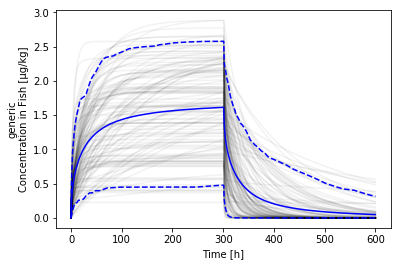

In [15]:
for i in output_results.ex_id.unique():
    x= output_results.loc[output_results['ex_id'] == i].time
    y= output_results.loc[output_results['ex_id'] == i].C_int  
    plt.plot(x,y,c='k', alpha = 0.05)
    plt.xlabel('Time [h]')
    plt.ylabel(substance.chemical+'\n'+'Concentration in Fish [µg/kg]')
                 
plt.plot(summary_df.time, summary_df.mean_, color= 'b')
plt.plot(summary_df.time, summary_df.lower, color= 'b', linestyle= '--')
plt.plot(summary_df.time, summary_df.upper, color= 'b', linestyle= '--') 

<a id='section_ID10'></a>
## Step 10 - Calculating rate constants and bioconcentration factors

The function *analyse_results* calculates the uptake rate constant **k1** and the depuration rate constant **k2** as well as the steady-state bioconcentration factor **BCF_ss** and the kinetic bioconcentration factor **BCF_kin** from the simulated model results. 

In [16]:
### Calculate slope of line from two points
def slope(x1, y1, x2, y2):
    return (y2-y1)/(x2-x1)

### Evaluation of the resampling predictions 
def analyse_results (exposure, collection,collection_id_list):
    
    ### Curve fit function for the determination of uptake rate constant k1
    def derive_k1(x, k1):
        return exposure.C_exp * (k1 / k2[i]) * (1 - np.exp(-k2[i] * x))   

    ### Initialize data frames as empty lists
    analysis_collection_list = []   
    steady_state = []
    BCF_ss = []
    k2 = []
    k1 = []
    BCF_kin = []
    ex_id = []
    
    
    ### Iterate through results data frames
    for i in range(0, len(collection.index)): 
        ex_id.append(collection_id_list[i])  #keep track of ex_id
            
        #1# Steady-state monitoring   
        if (np.abs(collection[exposure.expo][i]-collection[exposure.expo-1][i])) <= 0.0005*collection[exposure.expo][i]:
            steady_state.append(True)
        else:
            steady_state.append(False)
            #print('Prediction ' + str(collection_id_list[i]) + ' is not in steady state')      
            
            
        #2# Calculation of BCF_ss (only at steady state conditions)
        if steady_state[i] == True:
            BCF_ss.append((collection[exposure.expo][i]/exposure.C_exp)*1000) 
        else:
            BCF_ss.append(float('nan'))
            
        #3# Calculation of k2 (only at steady state conditions)
        if steady_state[i] == True:
            x2_elim = exposure.sim - 1   
            x1_elim = exposure.expo + 1
            y2_elim = collection[x2_elim][i]
            y1_elim = collection[x1_elim][i]
            elim_rate = slope(x1_elim, np.log(y1_elim), x2_elim, np.log(y2_elim))
            k2.append(-1*elim_rate)
        else:
            k2.append(float('nan'))
                      
        #4# Calculation of k1 (only at steady state conditions)
        try:
            popt, pcov = curve_fit(derive_k1, collection.columns[:exposure.expo], collection.values[i][:exposure.expo])
            k1.append(popt[0]*1000)
        except (RuntimeError):
            #print(str(RuntimeError))
            k1.append(float('nan'))
            
        #5# Calculation of BCF_kin (only at steady state conditions)
        if np.isnan(k1[i]) or steady_state[i] == False: 
            BCF_kin.append(float('nan'))
            #print('It was not possible to calkulate k1 for prediction ' + str(collection_id_list[i]) + '. No BCF_kin was calculated')
        else:    
            BCF_kin.append(k1[i]/k2[i])
        
            
    analysis_collection_list = [steady_state, BCF_ss, k1, k2, BCF_kin, ex_id]
    
    return analysis_collection_list

Here, we call the analyse_results function and inform it with our modelled **substance**, the data frame containing only the internal concentrations of the single model results **df_data_T** and their IDs **df_id_list**. 

In [17]:
new_analysis = analyse_results(substance, df_data_T, df_id_list)

Here, we filter the analysis results, to catch those model runs, which could not be analyzed according to the specified analysis criteria. Finally, we store the analyzed data in a data frame **df_A**. 

In [18]:
### Initialise lists to store the 'usable' outputs (in terms of steady state)
col0 = []
col1 = []
col2 = []
col3 = []
col4 = []


for i in range(0, len(new_analysis[0])):
    if new_analysis[0][i] == False: 
        print('The prediction ' + str(new_analysis[5][i]) + ' is not in steady state and therefore excluded from further analysis')
    elif np.isnan(new_analysis[2][i]) or np.isinf(new_analysis[2][i]):
        print('The prediction ' + str(new_analysis[5][i]) + ' does not have k1 and therefore excluded from further analysis')
    elif np.isnan(new_analysis[3][i]) or np.isinf(new_analysis[3][i]):
        print('The prediction ' + str(new_analysis[5][i]) + ' does not have k2 and therefore excluded from further analysis')
    elif np.isnan(new_analysis[4][i]) or np.isinf(new_analysis[4][i]):
        print('The prediction ' + str(new_analysis[5][i]) + ' does not have BCF_kin and therefore excluded from further analysis')
    else :    
        col0.append(new_analysis[5][i])
        col1.append(new_analysis[1][i])
        col2.append(new_analysis[2][i])
        col3.append(new_analysis[3][i])
        col4.append(new_analysis[4][i])
        
### Create a dataframe df_A for analysis results   
df_A = dict(ex_id=col0, BCF_ss = col1, k1 = col2, k2 = col3, BCF_kin = col4)  
df_A = pd.DataFrame.from_dict(df_A, orient='columns', dtype=None) 

The prediction 8 is not in steady state and therefore excluded from further analysis
The prediction 25 is not in steady state and therefore excluded from further analysis
The prediction 28 is not in steady state and therefore excluded from further analysis
The prediction 31 is not in steady state and therefore excluded from further analysis
The prediction 40 is not in steady state and therefore excluded from further analysis
The prediction 52 is not in steady state and therefore excluded from further analysis
The prediction 59 is not in steady state and therefore excluded from further analysis
The prediction 70 is not in steady state and therefore excluded from further analysis
The prediction 81 is not in steady state and therefore excluded from further analysis
The prediction 98 is not in steady state and therefore excluded from further analysis
The prediction 100 is not in steady state and therefore excluded from further analysis
The prediction 103 is not in steady state and therefor

**Save** the analysis **.csv files**. 

<div class="alert alert-block alert-info">
<b>Note:</b> Our recommended file name refers to the <b>date</b> of simulation, the <b>chemical</b>  and the <b>number of simulations</b> as in:
    
    JJJJMMDD_PBTK_chemical_r000_A.csv  
    
The A at the end refer to the analysis file. These names will be automatically generated based on the specified variables (see Step 5). They can also be changed to any other string file name.
</div>


In [19]:
#concatenate file name from specifyed variables
file_name_A= date+'_PBTK_'+substance.chemical+'_r'+str(runs)+'_A.csv' 

<div class="alert alert-block alert-danger">
<b>Warning:</b> The next code cell will create a .csv files with the name specified above, into the same working directory where you stored this notebook file. Be aware, that we are using the ‘a’ – appending mode – of the open() function. Hence, if you already have a file that has the above specified name in your working directory, the new data will be added to the end of this file. Thus, if you want to store it separately, make sure you have unique file names or remove files with the same name to a different directory. 


In [20]:
### Create csv file
with open(file_name_A, 'a') as output_file_analysis:
    df_A.to_csv(output_file_analysis, index=False)
print('A csv file '+file_name_A+' containing the analyis of the PBTK results was generated.')      

A csv file 20200730_PBTK_generic_r200_A.csv containing the analyis of the PBTK results was generated.


<a id='section_ID11'></a>
## Step 11 - Plotting rate constants and bioconcentration factors 



Summary:
            ex_id      BCF_ss          k1          k2     BCF_kin
count  116.000000  116.000000  116.000000  116.000000  116.000000
mean    98.689655  326.350033   16.440351    0.073186  334.660004
std     59.548652  137.122004   15.363729    0.120102  140.834718
min      0.000000   45.349872    1.383248    0.007282   45.420569
25%     50.750000  210.935148    8.057733    0.023289  221.574407
50%    100.000000  335.167746   13.547147    0.040029  340.221902
75%    148.500000  438.467551   18.621576    0.068808  455.246403
max    199.000000  577.054550  106.981242    0.918723  581.431036
Geometric means:
ex_id        0.000000
BCF_ss     289.593628
k1          12.535267
k2           0.042225
BCF_kin    296.866719
dtype: float64


C:\Users\magol001\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:308: RuntimeWarning: divide by zero encountered in log
  log_a = np.log(np.array(a, dtype=dtype))


Text(0, 0.5, 'k2 [1/h]')

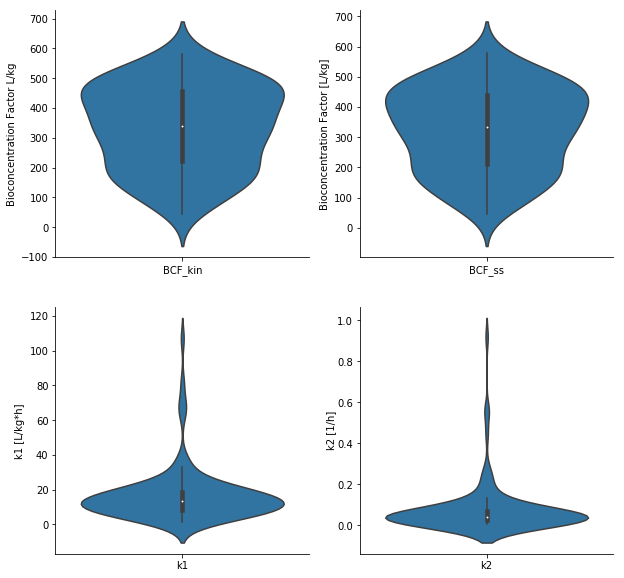

In [21]:
### Print the summary description of analysis results (e,g, means, std and min and max) 
print('Summary:')
print(df_A.describe()) 
### Print the geometric mean (not included in describe function above) of analysis results
print('Geometric means:')
print(df_A.apply(scst.gmean))

_, axes = plt.subplots(2, 2, sharey=False, figsize=(10, 10))  ##defining the number of plots (2+2=4)
sns.despine()  ## remove the top and right line in graph

g1 = sns.violinplot(data=df_A, y='BCF_kin', ax=axes[0,0])
g1.set_xticklabels(['BCF_kin'])
#g1.set_title("Title",fontsize=25)   
g1.set_ylabel('Bioconcentration Factor L/kg',fontsize=10, )

g2 = sns.violinplot(data=df_A, y='BCF_ss', ax=axes[0,1])
g2.set_xticklabels(['BCF_ss'])
#g2.set_title("Title",fontsize=25)
g2.set_ylabel('Bioconcentration Factor [L/kg]',fontsize=10)

g3 = sns.violinplot(data=df_A, y='k1', ax=axes[1,0])
g3.set_xticklabels(['k1'])
#g3.set_title("Title",fontsize=25)
g3.set_ylabel('k1 [L/kg*h]',fontsize=10)

g4 = sns.violinplot(data=df_A, y='k2', ax=axes[1,1])
g4.set_xticklabels(['k2']) 
#g4.set_title("Title",fontsize=25)
g4.set_ylabel('k2 [1/h]',fontsize=10,labelpad= 1)

<a id='section_IDRef'></a>
# References
- Mangold-Döring, A., Grimard, C., Green, D., MacPherson, S., Hogan, N., Weber, L., ...& Brinkmann, M. (2020). A Novel Multi-Species Toxicokinetic Modeling Approach in Support of Chemical Risk Assessment (submitted to ES&T in August 2020)
- Brinkmann, M., Eichbaum, K., Buchinger, S., Reifferscheid, G., Bui, T., Schaeffer, A., ... & Preuss, T. G. (2014a). Understanding receptor-mediated effects in rainbow trout: in vitro-in vivo extrapolation using physiologically based toxicokinetic models. Environmental science & technology, 48(6), 3303-3309.
- Brinkmann, M., Eichbaum, K., Kammann, U., Hudjetz, S., Cofalla, C., Buchinger, S., ... & Hollert, H. (2014b). Physiologically-based toxicokinetic models help identifying the key factors affecting contaminant uptake during flood events. Aquatic toxicology, 152, 38-46.
- Brinkmann, M., Schlechtriem, C., Reininghaus, M., Eichbaum, K., Buchinger, S., Reifferscheid, G., ... & Preuss, T. G. (2016). Cross-species extrapolation of uptake and disposition of neutral organic chemicals in fish using a multispecies physiologically-based toxicokinetic model framework. Environmental science & technology, 50(4), 1914-1923.
- Nichols, J. W., McKim, J. M., Andersen, M. E., Gargas, M. L., Clewell 3rd, H. J., & Erickson, R. J. (1990). A physiologically based toxicokinetic model for the uptake and disposition of waterborne organic chemicals in fish. Toxicology and applied pharmacology, 106(3), 433.
- Stadnicka, J., Schirmer, K., & Ashauer, R. (2012). Predicting concentrations of organic chemicals in fish by using toxicokinetic models. Environmental science & technology, 46(6), 3273-3280.